In [3]:
import pysam as ps
import pandas as pd
import pyranges as pr
import numpy as np
from intervaltree import IntervalTree
from scipy.sparse import dok_matrix
import sys
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [22]:
def read_connections(tsv_path):
    df = pd.read_csv(tsv_path, sep="\t")
    df["total_reads"] = df["tss_read_count"] + df["pas_read_count"] - df["count"]
    df["span_frac"] = df["count"] / df["total_reads"]
    dff = df[df["count"] > 500].copy()
    dff["length_bin"] = pd.qcut(dff["median_aln_length"], q=20)
    return(dff)


In [26]:
pliv = read_connections("/no_backup/mirimia/jchamberlin/data/arnau/pliv01/bambu_out/paraclu/peak_pairwise_connections1408.tsv")
nvec = read_connections("/no_backup/mirimia/jchamberlin/data/arnau/nvec01/bambu_out_newgtf/paraclu/peak_pairwise_connections1408.tsv")
blan = read_connections("/no_backup/mirimia/jchamberlin/data/IRIMIAMAN119/amphioxus/bambu_bla_fakegtf/paraclu/peak_pairwise_connections1408.tsv")
mlei = read_connections("/no_backup/mirimia/jchamberlin/data/IRIMIAMAN122/bambu_mlei_newgtf_full/paraclu/peak_pairwise_connections1408.tsv")
clat = read_connections("/no_backup/mirimia/jchamberlin/data/IRIMIAMAN119/clathrina/bambu_clathrina/paraclu/peak_pairwise_connections1408.tsv")

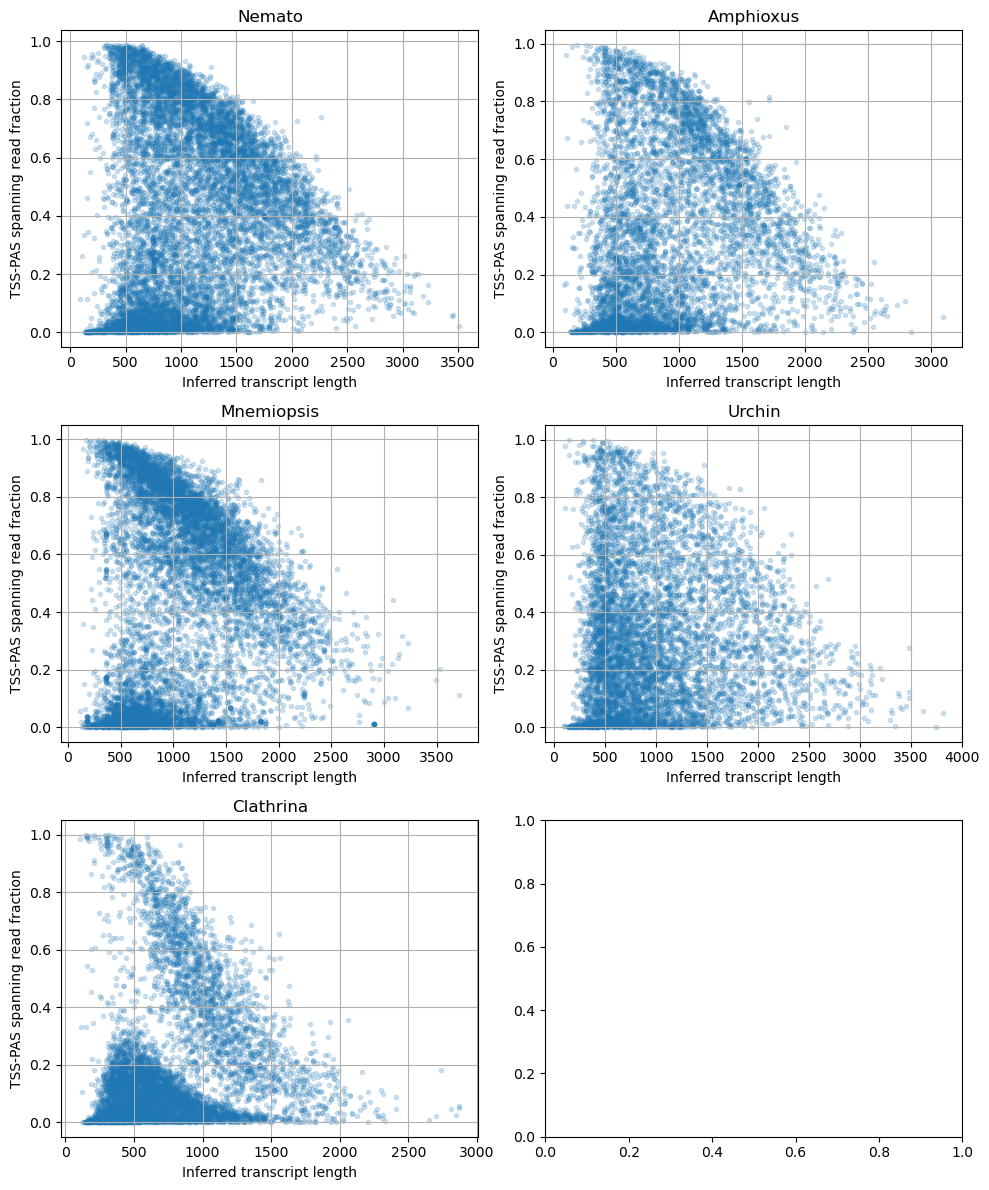

In [66]:
dfs = [nvec,blan,mlei,pliv,clat]
names = ["Nemato","Amphioxus","Mnemiopsis","Urchin","Clathrina"]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))  # 5 rows, 1 column
axes = axes.flatten()  # Flatten to loop easily

for ax, dft, i in zip(axes, dfs, names):
    ax.scatter(dft['median_aln_length'], dft['span_frac'], marker=".",alpha=.2)
    ax.set_title(i)
    ax.set_xlabel('Inferred transcript length')
    ax.set_ylabel('TSS-PAS spanning read fraction')
    ax.grid(True)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [65]:
# what fraction of the peak pairs (min 500 spanning reads) are higher than 20% span fraction?
for i, n in zip(dfs,names):
    print(sum(i["span_frac"] > .2)/len(i), n)

0.6718055424193701 Nemato
0.6000320102432779 Amphioxus
0.6988591437930645 Mnemiopsis
0.6028507126781696 Urchin
0.2902808334411803 Clathrina
